### Function To Read Files

In [1]:
def read_file(path_ham,path_spam):
    
# Path of files are passed in as parameters
    ham_files=glob.glob(path_ham)
    ham_list=[] # empty list to store file information
    
    for file_path in ham_files:
        with open(file_path,encoding="utf8",errors="ignore") as f:
            ham_list.append(f.read()) # appending info into list
            
    ham_df=pd.DataFrame(ham_list,columns=["Emails"]) # converting list to data frame
    ham_df["Target"]=0 # creating target column 0 for ham
    print("Shape of Ham data")
    print(ham_df.shape) #checking shape of data frame
    
    spam_files=glob.glob(path_spam)
    spam_list=[]
    
    for file_path in spam_files:
        with open(file_path,encoding="utf8",errors="ignore") as f:
            spam_list.append(f.read())
            
    spam_df=pd.DataFrame(spam_list,columns=["Emails"])
    spam_df["Target"]=1 # creating target column 1 for spam
    print("\n")
    print("Shape of Spam Data")
    print(spam_df.shape)
    
    df=pd.concat([ham_df,spam_df]) # concatenating ham and spam data into one dataframe
    df=shuffle(df,random_state=1)  # shuffling data for equal distribution of two classes
    df.reset_index(drop=True, inplace=True) # resetting index
    return df


### Function To check the data structure

In [2]:
def data_check(df):
    print("\n")
    print("Combined data")
    print(df.head(5))
    print("\n")
    
    print("Checking for Null values\n")
    print(df.isnull().sum()) 
    
    print("Shape of the data before removing duplicates")
    print(df.shape) # checking row and column size of data
    
    duplicate=df[df.duplicated()] 
    # check if duplicate records are present
    print("Number of duplicate records")
    print(duplicate.shape[0])
    df.drop_duplicates(inplace=True) # dropping duplicates
    df.reset_index(drop=True, inplace=True)
    
    print("Shape of the data after removing duplicates")
    print(df.shape)
    
    #plotting pie chart to show distribution of data
    df["Target"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
    plt.title("Spam vs Ham")
    plt.legend(["Ham", "Spam"])
    plt.show()

    return df

### Function To Pre Process Data

In [3]:
def text_cleaning(final_df,stop_words=False,stem=False):
    # Data frame and two prameters which are True are passed into the function
    snowball=SnowballStemmer(language='english') # for stemming
    stop=stopwords.words('english')  # for stopwords removal
    newStopWords = ['subject','re','fw','\n'] # additional stop words
    stop.extend(newStopWords) #adding to stop words list
    stop=set(stop)
    
    #lower case
    final_df['Emails']=final_df['Emails'].str.lower()
    
    
    #remove punctuation
    final_df['Emails']=final_df['Emails'].astype(str).str.replace('[^\w\s]','')
    
    #tokenize text
    final_df['Emails'] = final_df.apply(lambda row: nltk.word_tokenize(row['Emails']), axis=1)
    
    #removing common words
    if stop_words:
        final_df['Emails']=final_df['Emails'].apply(lambda x: [item for item in x if item not in stop])
        
    #stemming
    if stem:
        final_df['Emails']=final_df['Emails'].apply(lambda x: [snowball.stem(item) for item in x ])
    
    #remove words that contain numbers
    final_df['Emails']=final_df['Emails'].apply(lambda x: [word for word in x if not any(c.isdigit() for c in word)])
    
    #remove empty tokens
    final_df['Emails']=final_df['Emails'].apply(lambda x: [t for t in x if len(t)>0])
    
    #remove words with only one letter
    final_df['Emails']=final_df['Emails'].apply(lambda x: [t for t in x if len(t)>1])
    
    #join all
    final_df['Emails']=final_df['Emails'].str.join(" ")
    
    #removing empty emails
    final_df=final_df[final_df['Emails'].map(len)>0]
    
    final_df.reset_index(drop=True, inplace=True)
    
    return final_df

### Function for Length Calculation & Distribution Plots

In [4]:
def data_exploration(x):
    #calculating length
    length=[]
    for i in range(0,len(x)):
        length.append(len(x["Emails"][i]))
    x.insert(len(x.columns), 'Length', length) # inserting lengths into a new column in data frame
    
    #creating separate data frames fro ham and spam for analysis
    spam_messages=x[x["Target"]==1]
    ham_messages=x[x["Target"]==0]
    
    print("\n")
    print("----------Average length----------")
    print("Average length of spam messages ",round(spam_messages['Length'].mean(),0))
    print("Average length of ham messages ",round(ham_messages['Length'].mean(),0))
    
    #To create boxplot
    spam_len=spam_messages['Length'].to_numpy() #converting to array
    ham_len=ham_messages['Length'].to_numpy()
    data = [spam_len, ham_len]
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data, patch_artist=True)## change outline color, fill color and linewidth of the boxes

    ax.set_xticklabels(['Spam', 'Ham'])
    plt.xlabel('Category') 
    plt.ylabel('Length') 

    # displaying the title
    plt.title("Boxplot of Lengths of Spam and Ham Emails")

    plt.show()
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
    return x

### Function To Analyze Emails by Length

In [5]:
def largest(df):
    print("----------Data Frame sorted by largest length-----------")
    print(df.sort_values('Length',ascending=False).head())
   
    print("----------Description of Entire Data by Length----------")
    print(df['Length'].describe())
    
    #creating separate data frames for ham and spam for analysis
    spam_messages=df[df["Target"]==1]
    ham_messages=df[df["Target"]==0]
    
    # Frequency distribution plot for spam data
    ax1=spam_messages.hist(column='Length', bins=50,figsize=(12,4),range=(0,5000))
    for ax in ax1.flatten():
        ax.set_xlabel("Length of Email")
        ax.set_ylabel("Frequency")
        ax.set_title("Histogram of Length of Spam Emails")
        
    # Frequency distribution plot for ham data    
    ax1=ham_messages.hist(column='Length', bins=50,figsize=(12,4),range=(0,5000))
    for ax in ax1.flatten():
        ax.set_xlabel("Length of Email")
        ax.set_ylabel("Frequency")
        ax.set_title("Histogram of Length of Ham Emails")
    
    
    print("----------Description of Spam Data by Length----------")
    print(spam_messages['Length'].describe())
    print("----------Description of Ham Data by Length----------")
    print(ham_messages['Length'].describe())
    

### Function To Find Top Words in Ham and Spam

In [6]:
def top_words(df_train_vec):
    import seaborn as sns
     #creating separate data frames for ham and spam for analysis
    spam_messages=df_train_vec[df_train_vec["Target"]==1]
    ham_messages=df_train_vec[df_train_vec["Target"]==0]
    
    vectorizer_spam = TfidfVectorizer().fit(spam_messages['Emails']) # fitting spam data
    tfidf_spam = vectorizer_spam.transform(spam_messages['Emails']) # transforming it based on term freq and inverse doc freq
    
    # summing the values for each column( each column is a word in corpus). hence total count for each word based on tfidf is obtained as a vector
    tfidf_sum_words_spam = tfidf_spam.sum(axis=0) 
    
    # the word and its corresponding value is fetched as list of tuples. 
    # word and its index is obtained from vocabulary_.items() and this is searched in sum vector
    tfidf_words_freq_spam = [(word, tfidf_sum_words_spam[0, idx]) for word, idx in vectorizer_spam.vocabulary_.items()]
    tfidf_words_freq_spam =sorted(tfidf_words_freq_spam, key = lambda x: x[1], reverse=True) # sorting the list based on values descending
    
    dict_spam=dict(tfidf_words_freq_spam) # converting list of tuples into a dictionary
    first20vals_spam = list(dict_spam.values())[0:20] # taking first 20 dict values
    fisrt20keys_spam= list(dict_spam.keys())[0:20]  # taking first 20 dict keys
    
    #plotting bar plot
    fig = plt.figure(1, figsize=(15, 6))
    ax=sns.barplot(fisrt20keys_spam,first20vals_spam)
    ax.set(xlabel='Word', ylabel='Occurence using Tfidf',title="Top 20 words in Spam")
    plt.show()

    # fitting and transforming ham data
    vectorizer_ham = TfidfVectorizer().fit(ham_messages['Emails'])
    tfidf_ham = vectorizer_ham.transform(ham_messages['Emails'])
    
    tfidf_sum_words_ham = tfidf_ham.sum(axis=0)
    
    tfidf_words_freq_ham = [(word, round(tfidf_sum_words_ham[0, idx],2)) for word, idx in vectorizer_ham.vocabulary_.items()]
    tfidf_words_freq_ham =sorted(tfidf_words_freq_ham, key = lambda x: x[1], reverse=True)
   
    dict_ham=dict(tfidf_words_freq_ham)
    first20vals_ham = list(dict_ham.values())[0:20]
    fisrt20keys_ham= list(dict_ham.keys())[0:20]
    
    #plotting bar plot
    fig = plt.figure(1, figsize=(15, 6))
    ax=sns.barplot(fisrt20keys_ham,first20vals_ham)
    ax.set(xlabel='Word', ylabel='Occurence using Tfidf',title="Top 20 words in Ham")
    plt.show()

### Function to Compare models Based on CountVectorized Data Using Cross Validation

In [7]:
# evaluate each model in turn
def modelselection_cv(models,features_train_cv,result_train):
    # list of models (model name and model function) and traning data is passed into this function
    results = [] # list to store accuracy
    names = []  # list  to store name of each model
    scoring = 'accuracy'
    
    # for each model
    for name, model in models:
        val=0 # to store k value
        avg=0 # to store average cross validation score
        # for k from 2 to 11
        for i in range(2,11):
            
            # stratified k fold cross validation used since the data is imbalanced
            stratifiedkf=StratifiedKFold(n_splits=i) 
            # obtaning cross validation score for each k
            score=cross_val_score(model,features_train_cv,result_train,cv=stratifiedkf)
            
            # calculating mean cross validation score and comparing to find best k value for each model
            if score.mean()>avg:
                val=i
                avg=score.mean()
        print("------------------",name,"--------------------------")
        print("Best K value for ",name," is ",val)
        
        # performing cross validation for each model on optimum value of k to get accuracy for training data
        stratifiedkf=StratifiedKFold(n_splits=val)
        accuracy=cross_val_score(model,features_train_cv,result_train,scoring='accuracy',cv=stratifiedkf)
        print("Score in each folds are ",accuracy)
        #get the mean accuracy of all folds 
        print("Overall Accuracy of Model with Cross Validation is: {0:0.2f}".format(accuracy.mean() * 100))
        #predicted = cross_val_predict(model,features_train_cv,result_train,cv=stratifiedkf)

        # appending list of accuracies for each fold for optimum value of k
        results.append(accuracy)
        names.append(name) # appending name of model
        msg = "%s: %f (%f)" % (name, accuracy.mean(), accuracy.std()) # to print mean accuracy and std deviation of accuracy
        print(msg)
        
    # boxplot for algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results) # boxplot is based on accuracy
    plt.ylabel("Accuracy")
    ax.set_xticklabels(names)
    plt.show()

### Function to Compare models Based on TfidfVectorized Data Using Cross Validation

In [8]:
# evaluate each model in turn
# this function is similar to the function above, except that the data is tfidfvectorized
def modelselection_tf(models,features_train_tf,result_train):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        val=0
        avg=0
        for i in range(2,11):
            stratifiedkf=StratifiedKFold(n_splits=i)
            score=cross_val_score(model,features_train_tf,result_train,cv=stratifiedkf)
            if score.mean()>avg:
                val=i
                avg=score.mean()
        print("------------------",name,"--------------------------")
        print("Best K value for ",name," is ",val)
        
        stratifiedkf=StratifiedKFold(n_splits=val)
        accuracy=cross_val_score(model,features_train_tf,result_train,scoring='accuracy',cv=stratifiedkf)
        print("Score in each folds are ",accuracy)
        #get the mean of each fold 
        print("Overall Accuracy of Model with Cross Validation is: {0:0.2f}".format(accuracy.mean() * 100))
        #predicted = cross_val_predict(model,features_train_tf,result_train,cv=stratifiedkf)

      
        results.append(accuracy)
        names.append(name)
        msg = "%s: %f (%f)" % (name, accuracy.mean(), accuracy.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.ylabel("Accuracy")
    ax.set_xticklabels(names)
    plt.show()

### Function for Model Selection

In [9]:
def model_selection(features_train_cv,features_train_tf,result_train):
    #countvectorized and tfidfvectorized training features along with traning results are passed into this function
    
    #Empty list to append all models
    models = []
    # Appending model names and models to list
    models.append(('LR', LogisticRegression(random_state=1)))
    models.append(('MNB', MultinomialNB()))
    models.append(('SVM', svm.SVC(random_state=1)))
    models.append(('Dtree', DecisionTreeClassifier(random_state=1)))
    
    print("Using CountVectorizer")
    # Function calls for model selection based on countvectorization
    modelselection_cv(models,features_train_cv,result_train)
    # Function calls for model selection based on Tfidfvectorization
    print("Using TfidfVectorizer")
    modelselection_tf(models,features_train_tf,result_train)

### Function for Creating Model Pipeline and Using GridSearchCv

In [10]:
def model_pipeline(features_train_g,result_train):
    
    #Creating a model pippeline with vectorization
    pipe = Pipeline(steps=[('tfidf_vectorization', TfidfVectorizer()),('classifier', MultinomialNB())])
    
    #model parameters are passed as a list of dictionariy
    search_space=[{'classifier':[LogisticRegression(random_state=1)]},
                 {'classifier':[MultinomialNB()]},
                 {'classifier':[svm.SVC(probability=True,random_state=1)]},
                 {'classifier':[DecisionTreeClassifier(random_state=1)]}
                 ]
    #scoring of models is based on accuracy and ROC-AUC
    scoring={'AUC':'roc_auc','Accuracy':make_scorer(accuracy_score)}
    
    #Executing pipleine and hyper parameter tuning with Gridsearchcv
    grid=GridSearchCV(estimator=pipe,param_grid=search_space,cv=6,scoring=scoring,return_train_score=True,n_jobs=-1,refit='AUC')
    
    #Fitting the best model
    best_model=grid.fit(features_train_g,result_train)
    print("Best model Accuracy was found to be ",round(best_model.best_score_*100,2))
    print("Best classification model is ",best_model.best_params_)
    
    return best_model

### Function for Creating Model Pipeline and Using GridSearchCv For More Hyper Parameter Tuning

In [11]:
def hyperparameter_tuning_extra(features_train_g,result_train):
    # function takes 15 minutes to run
    # Initialze the estimators

    model1 = svm.SVC(probability=True, random_state=1)
    model2 = LogisticRegression(random_state=1)
    model3 = DecisionTreeClassifier(random_state=1)
    model4 = MultinomialNB()
    
    # Initiaze the hyperparameters for each dictionary
    param1 = {}
    # parameters for SVM MODEL
    param1['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
    param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
    param1['classifier'] = [model1]

    param2 = {}
    # parameters for LR MODEL
    param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
    param2['classifier__penalty'] = ['l1', 'l2']
    param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
    param2['classifier'] = [model2]

    param3 = {}
    # parameters for Decision Tree MODEL
    param3['classifier__max_depth'] = [5,10,25,None]
    param3['classifier__min_samples_split'] = [2,5,10]
    param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
    param3['classifier'] = [model3]

    param4 = {}
    # parameters for Multinomial Naive Bayes MODEL
    param4['classifier__alpha'] = [10**0, 10**1, 10**2]
    param4['classifier'] = [model4]
    
    #Creating a model pippeline with vectorization
    pipeline = Pipeline(steps=[('vectorization', TfidfVectorizer()),('classifier', clf1)])
    #passing dictionary parameters as a list
    params = [param1,param2,param3, param4]
    
    #scoring of models is based on accuracy and ROC-AUC
    scoring_p={'AUC':'roc_auc','Accuracy':make_scorer(accuracy_score)}
    
    #Executing pipleine and hyper parameter tuning with Gridsearchcv
    gs = GridSearchCV(estimator=pipeline, param_grid=params, cv=6, n_jobs=-1, scoring=scoring_p,return_train_score=True,refit='AUC')
    
    #Fitting the best model
    best_model=gs.fit(features_train_g,result_train)
    warnings.filterwarnings("ignore")
    
    return best_model

### Function To Save and Load Model

In [12]:
def save_model(best_model):
    
    with open('best_model', 'wb') as files:
        pickle.dump(best_model, files)  # Saving best model to Disk
def import_model():
    with open('best_model' , 'rb') as f:
        best_svm = pickle.load(f)    # Loading saved pre trained model 
    return best_svm

### Function For Final Model Evaluation

In [13]:
def model_evaluation(best_svm,features_test_g,result_test):
    # best selected model and testing data is passed into this function
    
    # predicting model results
    y_pred=best_svm.predict(features_test_g)
    
    #calculating accuracy using predictions and real testing results
    print('Model Test accuracy score: {0:0.2f}'.format(accuracy_score(result_test,y_pred)*100))
    print("\n")
    cm = confusion_matrix(result_test, y_pred)
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    print('Confusion matrix\n\n', cm)
    print('\nTrue Negatives(TN) Correctly Predicted as Ham =  ', cm[0,0])
    print('\nTrue Positives(TP) Correctly Predicted as Spam = ', cm[1,1])
    print('\nFalse Positives(FP)Wrongly Predicted as Spam =   ', cm[0,1])
    print('\nFalse Negatives(FN)Wrongly Predicted as Ham =    ', cm[1,0])
    
    # visualize confusion matrix with seaborn heatmap
    cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'],
                                     index=['Actual Negative:0', 'Actual Positive:1'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()

    # print classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.2f}'.format(classification_error*100))
    
    # print precision score
    precision = TP / float(TP + FP)
    print('Precision : {0:0.2f}'.format(precision*100))
    
    # print recall
    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.2f}'.format(recall*100))
    
    print("---------------Classification Report-----------")
    print(classification_report(result_test, y_pred))
    
    # calculate the fpr and tpr for all thresholds of the classification
    probs = best_svm.predict_proba(features_test_g) #getting prediction probabilities
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(result_test, preds) 
    roc_auc = metrics.auc(fpr, tpr) #roc auc for plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) #using fpr and tpr to plot roc-auc curve
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # compute ROC AUC

    ROC_AUC = roc_auc_score(result_test, preds)
    print('ROC AUC : {:.2f}'.format(ROC_AUC*100))

In [14]:
import nltk

# Main Implementation starts Here

Shape of Ham data
(3672, 2)


Shape of Spam Data
(1500, 2)


Combined data
                                              Emails  Target
0  Subject: deals to be extended on meter 985097 ...       0
1  Subject: fw : [ fwd : two prayer requests ]\np...       0
2  Subject: cp & l\nthanks for your help .\nrebec...       0
3  Subject: revised nomination - june , 2000\ndar...       0
4  Subject: koch midstream services co\ni have be...       0


Checking for Null values

Emails    0
Target    0
dtype: int64
Shape of the data before removing duplicates
(5172, 2)
Number of duplicate records
178
Shape of the data after removing duplicates
(4994, 2)


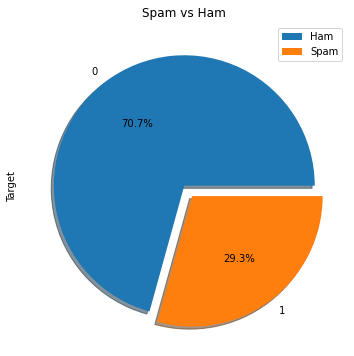

Shape of the data after pre processing is:  (4990, 2)


                                              Emails  Target
0  deal extend meter accord meter statement overf...       0
1  fwd two prayer request pleas respond origin me...       0
2  cp thank help rebecca forward rebecca griffin ...       0
3  revis nomin june daren fyi receiv revis nomin ...       0
4  koch midstream servic co bill koch midstream s...       0


---------Traning data Statistics--------
Shape of train features  (3493,)
Shape of train target (3493,)
Number of data points with Ham and Spam 
  0    2471
1    1022
Name: Target, dtype: int64


---------Testing data Statistics--------
Shape of test features  (1497,)
Shape of test target (1497,)
Number of data points with Ham and Spam 
  0    1060
1     437
Name: Target, dtype: int64


In [15]:
# importing required libraries
# Data cleaning and pre processing occurs here
import glob
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from collections import Counter
import random
import warnings
import string
import re
#nltk.download('all')  --------------------# downloading all packages of nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

#Getting file paths
ham_file_path="C:\\Users\\bless\\OneDrive\\Desktop\\MTU-Sem2\\Applied ML\\Assignment1\\enron1\\ham\\*.txt"
spam_file_path="C:\\Users\\bless\\OneDrive\\Desktop\\MTU-Sem2\\Applied ML\\Assignment1\\enron1\\spam\\*.txt"

# calling functon to read files. passing paths as parameters
final_df=read_file(ham_file_path,spam_file_path)

#calling function to check data for duplications
final_df=data_check(final_df)

#calling function for pre processing
final_df_cleaned=text_cleaning(final_df,stop_words=True,stem=True)
print("Shape of the data after pre processing is: ",final_df_cleaned.shape)
print("\n")
print(final_df_cleaned.head(5))

# splitting data into train and test
features_train, features_test, result_train, result_test = train_test_split(final_df_cleaned["Emails"], final_df_cleaned['Target'], test_size = 0.3, random_state = 1)
print("\n")
print("---------Traning data Statistics--------")
print("Shape of train features ",features_train.shape)
print("Shape of train target",result_train.shape)
print("Number of data points with Ham and Spam \n ",result_train.value_counts())
print("\n")
print("---------Testing data Statistics--------")
print("Shape of test features ",features_test.shape)
print("Shape of test target",result_test.shape)
print("Number of data points with Ham and Spam \n ",result_test.value_counts())

# A copy of train data is made that is used for EDA
features_train1=features_train
result_train1=result_train
#training data frame for EDA
df_train=pd.concat([features_train1,result_train1],axis=1)
df_train.reset_index(drop=True, inplace=True)

# initializing countvectorizer
cv = CountVectorizer()

#initializing tfidfvectorizer
tf = TfidfVectorizer()

# traning and testing features to be used in gridsearchcv. feature extraction happens in pipeline
features_train_g=features_train
features_test_g=features_test

#training and testing features countvectorized for model evaluation
features_train_cv = cv.fit_transform(features_train) # creation of encoded feature vector based on counts
features_test_cv = cv.transform(features_test) # test data transformed on the parameters learned using training data

#training and testing features tfidfvectorized for model evaluation
features_train_tf = tf.fit_transform(features_train)
features_test_tf = tf.transform(features_test)  # test data transformed on the parameters learned using training data


### Function Call for EDA



----------Average length----------
Average length of spam messages  780.0
Average length of ham messages  497.0


C:\Users\Anaconda\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


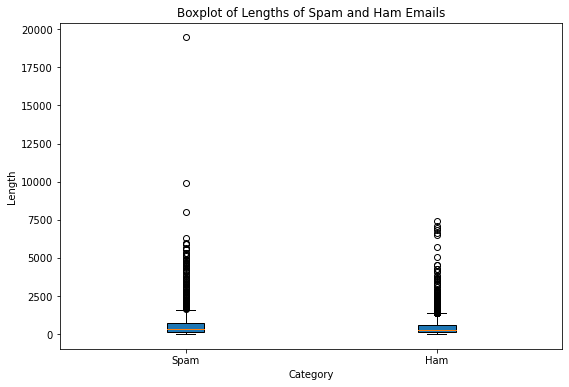

In [16]:
df_train=data_exploration(df_train)

### Function Call for Further EDA

----------Data Frame sorted by largest length-----------
                                                 Emails  Target  Length
2195  onlin pharxmaci med disscount phafrmaci onlsin...       1   19465
3295  cy adrian hideout der best men product today c...       1    9931
662   free profil choos derm htmlheadtitlelt lt subs...       1    7988
2603  hpl optim pleas make sure staff receiv includ ...       0    7401
3097  sitara releas chang global due consent assign ...       0    7069
----------Description of Entire Data by Length----------
count     3493.000000
mean       579.721729
std        905.161568
min          4.000000
25%        125.000000
50%        290.000000
75%        657.000000
max      19465.000000
Name: Length, dtype: float64
----------Description of Spam Data by Length----------
count     1022.000000
mean       779.538160
std       1276.003659
min          4.000000
25%        164.000000
50%        349.500000
75%        750.000000
max      19465.000000
Name: Length, dtyp

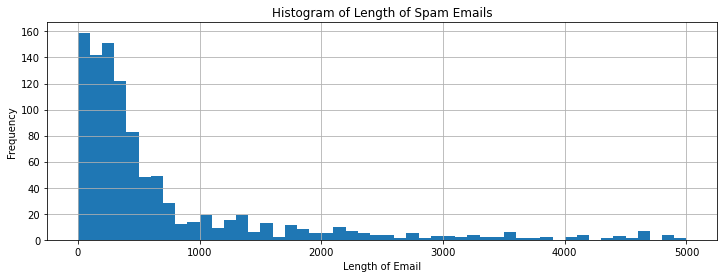

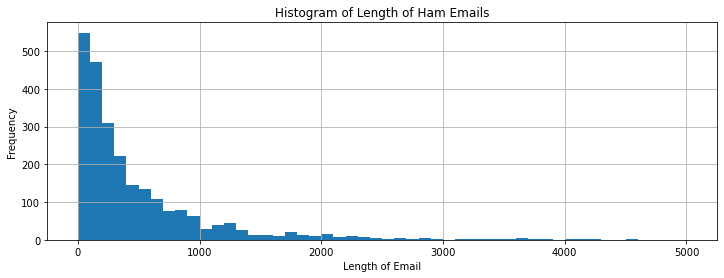

In [17]:
largest(df_train)

### Function Call to Find Important Words

C:\Users\bless\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


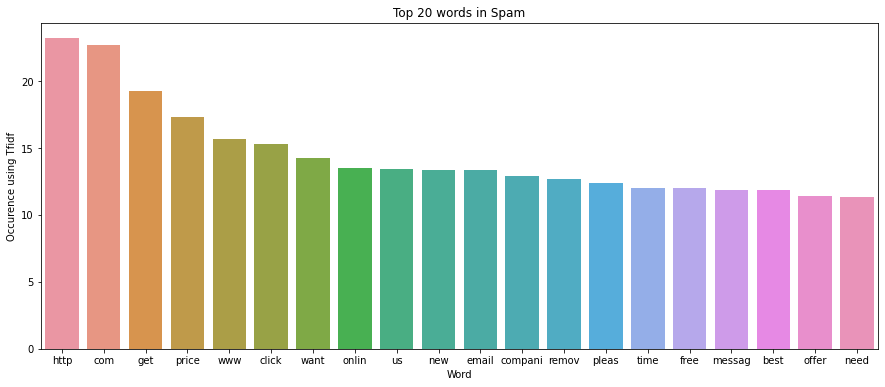

C:\Users\bless\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


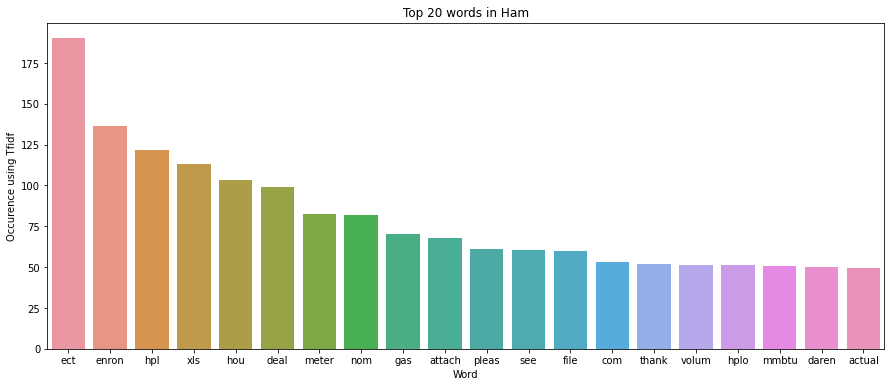

In [18]:
top_words(df_train)

### Function Call for Model Selection Using Cross Validation

Using CountVectorizer
------------------ LR --------------------------
Best K value for  LR  is  6
Score in each folds are  [0.96226415 0.9742268  0.98453608 0.97938144 0.96735395 0.9862543 ]
Overall Accuracy of Model with Cross Validation is: 97.57
LR: 0.975669 (0.008712)
------------------ MNB --------------------------
Best K value for  MNB  is  3
Score in each folds are  [0.97424893 0.98109966 0.98281787]
Overall Accuracy of Model with Cross Validation is: 97.94
MNB: 0.979389 (0.003702)
------------------ SVM --------------------------
Best K value for  SVM  is  10
Score in each folds are  [0.96285714 0.93142857 0.96       0.97707736 0.96561605 0.97707736
 0.96275072 0.96561605 0.95415473 0.97994269]
Overall Accuracy of Model with Cross Validation is: 96.37
SVM: 0.963652 (0.013330)
------------------ Dtree --------------------------
Best K value for  Dtree  is  8
Score in each folds are  [0.9382151  0.94508009 0.94736842 0.95652174 0.95881007 0.95412844
 0.93119266 0.93577982]
Over

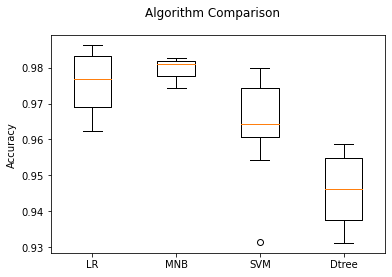

Using TfidfVectorizer
------------------ LR --------------------------
Best K value for  LR  is  8
Score in each folds are  [0.97254005 0.97940503 0.97940503 0.99313501 0.98627002 0.98623853
 0.97477064 0.99082569]
Overall Accuracy of Model with Cross Validation is: 98.28
LR: 0.982824 (0.006963)
------------------ MNB --------------------------
Best K value for  MNB  is  10
Score in each folds are  [0.93428571 0.89714286 0.93142857 0.9226361  0.91117479 0.91977077
 0.91404011 0.93696275 0.91404011 0.91404011]
Overall Accuracy of Model with Cross Validation is: 91.96
MNB: 0.919552 (0.011551)
------------------ SVM --------------------------
Best K value for  SVM  is  10
Score in each folds are  [0.98       0.97142857 0.98285714 0.98280802 0.99140401 0.99140401
 0.99426934 0.97707736 0.97994269 0.99140401]
Overall Accuracy of Model with Cross Validation is: 98.43
SVM: 0.984260 (0.007144)
------------------ Dtree --------------------------
Best K value for  Dtree  is  7
Score in each fold

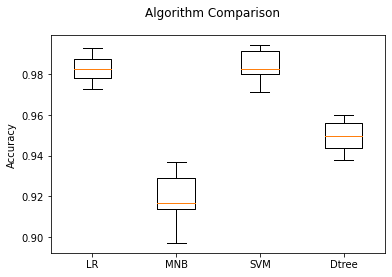

In [19]:
model_selection(features_train_cv,features_train_tf,result_train)

### Function Call To Find Best Model Using Pipeline And GridSearchCv

In [20]:
best_model=model_pipeline(features_train_g,result_train)

Best model Accuracy was found to be  99.84
Best classification model is  {'classifier': SVC(probability=True, random_state=1)}


### Function Call For Further Hyper Parameter Tuning

In [21]:
# As it takes 15-20 minutes to run and does not give much improved results, this model is not used further
#hyperparameter_tuning_extra(features_train_g,result_train)
#print(best_model.best_score_)
#print(best_model.best_params_)

### Function Call To Save and Load Best Model

In [22]:
save_model(best_model)
best_svm=import_model()

### Function Call To Evaluate Best Model

Model Test accuracy score: 98.73


Confusion matrix

 [[1047   13]
 [   6  431]]

True Negatives(TN) Correctly Predicted as Ham =   1047

True Positives(TP) Correctly Predicted as Spam =  431

False Positives(FP)Wrongly Predicted as Spam =    13

False Negatives(FN)Wrongly Predicted as Ham =     6


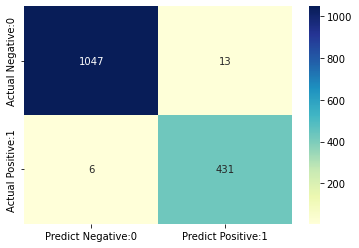

Classification error : 1.27
Precision : 97.07
Recall or Sensitivity : 98.63
---------------Classification Report-----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1060
           1       0.97      0.99      0.98       437

    accuracy                           0.99      1497
   macro avg       0.98      0.99      0.98      1497
weighted avg       0.99      0.99      0.99      1497



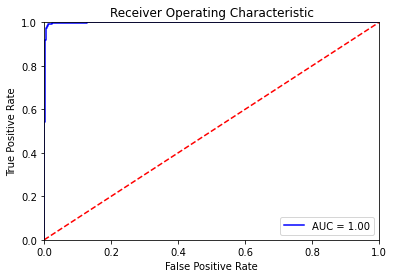

ROC AUC : 99.83


In [23]:
# model evaluation using imported pre trained model
model_evaluation(best_svm,features_test_g,result_test)